# Homework 6: Hypothesis testing and confidence intervals (50 points)

**Reading**: Textbook chapter [11](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses) Testing Hypotheses and [13](https://www.inferentialthinking.com/chapters/13/Estimation) Estimation.

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Homework 6 is due on Thursday, November 17, at 9:00am. Late work will not be accepted without prior arrangements.

In [2]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd

import warnings
warnings.simplefilter('ignore', FutureWarning)

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## 1. Landing a Spacecraft

(Note: This problem describes something that's close to [a real story with a very exciting video](http://www.space.com/29119-spacex-reusable-rocket-landing-crash-video.html), but the details have been changed somewhat.)

SpaceY, a company that builds and tests spacecraft, is testing a new reusable launch system.  Most spacecraft use a "first stage" rocket that propels a smaller payload craft away from Earth, then falls back to the ground and crashes.  SpaceY's new system is designed to land safely at a landing pad at a certain location, ready for later reuse.  If it doesn't land in the right location, it crashes, and the (very expensive) vehicle is destroyed.

SpaceY has tested this system over 1000 times.  Ordinarily, the vehicle doesn't land exactly on the landing pad.  For example, a gust of wind might move it by a few meters just before it lands.  It's reasonable to think of these small errors as random.  That is, the landing locations are drawn from some distribution over locations on the surface of Earth, centered around the landing pad.

Run the next cell to see a plot of those locations (meters away from the center of the landing pad).

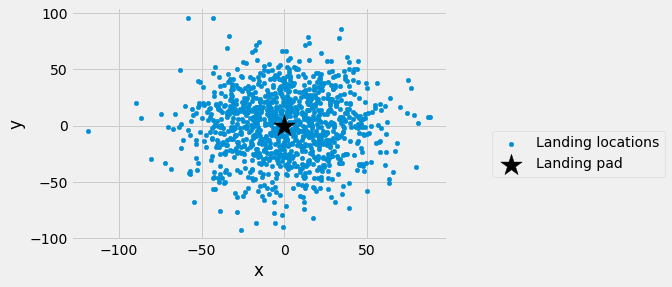

In [3]:
# make sure you specify the correct path to the data file
ordinary_landing_spots = pd.read_csv("ordinary_landing_spots.csv")
ordinary_landing_spots.plot.scatter("x", "y",label="Landing locations")
plt.scatter(0, 0, c="black", s=500, marker="*", label="Landing pad")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

During one test, the vehicle lands far away from the landing pad and crashes.  SpaceY investigators suspect there was a problem unique to this landing, a problem that wasn't part of the ordinary pattern of variation in landing locations.  They think a software error in the guidance system caused the craft to incorrectly attempt to land at a spot other than the landing pad.  The guidance system engineers think there was nothing out of the ordinary in this landing, and that there was no special problem with the guidance system.

Run the cell below to see a plot of the 1100 ordinary landings and the crash.

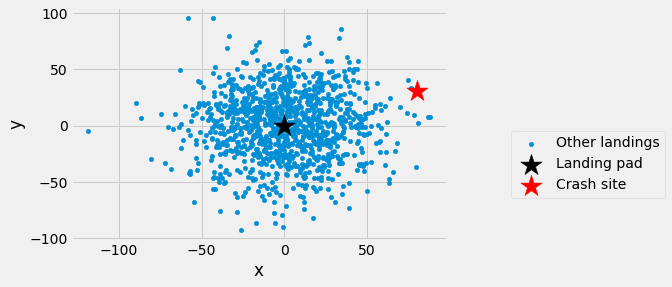

In [4]:
landing_spot = np.array([80.59, 30.91])
ordinary_landing_spots.plot.scatter("x", "y",label="Other landings")
plt.scatter(0, 0, c="black", s=500, marker="*", label="Landing pad")
plt.scatter(landing_spot.item(0), landing_spot.item(1), marker="*", c="r", s=500, label="Crash site")
plt.legend(scatterpoints=1, bbox_to_anchor=(1.6, .5));

#### Question 1

Suppose we would like to use hypothesis testing to shed light on this question.  We have written down an alternative hypothesis below.  What is a reasonable null hypothesis?

**Null hypothesis:** This landing was not special; the location was drawn from the distribution which the other 1100 landing locations were drawn

**Alternative hypothesis:** This landing was special; its location was a draw from some other distribution, not the distribution from which the other 1100 landing locations were drawn.


#### Question 2
What's a good test statistic?

*Answer here:*  Distance from Landing Pad

#### Question 3
Write a function called `landing_test_statistic`.  It should take two arguments: an "x" location and a "y" location (both numbers).  It should return the value of your test statistic for a landing at those coordinates.

In [5]:
def landing_test_statistic(x_coordinate, y_coordinate):
    return np.sqrt(x_coordinate**2+y_coordinate**2)

print('test', landing_test_statistic(3,4))

test 5.0


#### Question 4
The cell below computes a P-value using your test statistic.  Does the calculation makes sense for your test statistic? Describe the test procedure in words.  Is there a simulation involved?  If so, what is being simulated? If not, why not?

In [6]:
test_stat = landing_test_statistic(
    landing_spot.item(0),
    landing_spot.item(1))

null_stats = np.array([])
for i in np.arange(len(ordinary_landing_spots)):
    null_stat = landing_test_statistic(
        ordinary_landing_spots.x[i],
        ordinary_landing_spots.y[i])
    null_stats = np.append(null_stats, null_stat)

p_value = np.count_nonzero(null_stats > test_stat) / len(null_stats)
p_value

0.012727272727272728

This calculation does make sense for my test statistic. The test procedure (using my test statistic) computes the proportion of landing spots further away than the landing spot in question. There is no simulation involved, this is just using the data that we already have. 

#### Question 5

Do the data suggest that this landing was special? Give a short justification of your answer.

The data does suggest that the landing was special. The p-value of 0.012 signifies that, assuming the location of the landing was drawn from the same distribution of landings as the other 1100 landings, then there is a 1% chance that the landing would happen this way. That is small, less than 5%, which suggests that the null hypothesis is not true. 

## 2. Proportions known by sampling ##

In May 2015, there were a lot of Republican candidates for the party's presidential election ticket. You can read more about it here:
Denielle Kurtzleben, "The Math Problem Behind Ranking The Top 10 GOP Candidates" May 19, 2015  National Public Radio. 
http://www.npr.org/sections/itsallpolitics/2015/05/29/410524780/the-gop-has-an-overcrowded-debate-problem
 
 A Quinippiac University poll reported fractions of a sample of 679 likely Republican primary voters, 
 rounded to the nearest percentage.  The candidates with the top fourteen polling percentages got 
 about 470 votes are reported here:


|Candidate  | Proportion|
|:------------:|:------------:|
|Bush  | 0.10 |
|Carson| 0.10 |
|Huckabee | 0.10 |
|Rubio  | 0.10 |
|Paul   | 0.07 |
|Cruz   | 0.06 |
|Trump   | 0.05 |
|Christie   | 0.04 | 
|Fiorina  | 0.02 |
|Kasich   | 0.02 |
|Graham  | 0.01 |
|Jundal  | 0.01 |
|Perry  | 0.01 |


From this sample, we are asked by our sponsor to generate confidence intervals for the proportion of voters voting for candidate Paul (at 7% in the sample).   


In [7]:
# Run this cell
# The table `votes` contains the results of the survey. 
votes = pd.DataFrame({'vote': np.array(['Bush']*68 + ['Carson']*68+['Huckabee']*68+ 
                                       ['Rubio']*68 + ['Paul']*47+ ["Cruz"]*40 + 
                                       ["Trump"]*34 + ["Christie"]*27 + ["Fiorina"]*14 + 
                                       ["Kasich"]*14 +["Graham"]*7 + ["Jindal"]*7 + 
                                       ["Perry"]*7+['Other']*210)
                     })
num_votes =679
print(votes.shape)

(679, 1)


Below, we have give you code that will use bootstrapped samples to compute estimates of the true proportion of voters who are planning on voting for **Paul**.

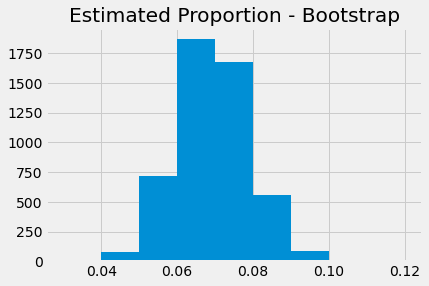

In [8]:
def proportions_in_resamples(nboot):
    statistics = np.array([])
    for i in np.arange(nboot):
        bootstrap = votes.sample(num_votes,replace=True)
        sample_statistic = np.count_nonzero(bootstrap.vote == 'Paul')/num_votes
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_proportions = proportions_in_resamples(5000)

plt.hist(sampled_proportions,bins=np.arange(0.03,.13,0.01))
plt.title("Estimated Proportion - Bootstrap")
plt.show()

**Question 1.** Using the array `sampled_proportions`, compute an 95% confidence interval for the true proportions of voters planning on voting for candidate Paul.  
(Compute the lower and upper ends of the interval, named `lower_bound` and `upper_bound`, respectively.) This is a **percentile bootstrap confidence interval** 

In [9]:
b_lower_bound = np.percentile(sampled_proportions, 2.5)
b_upper_bound = np.percentile(sampled_proportions, 97.5)
print("Bootstrapped 95% confidence interval for the proportion of B voters in the population: [{:f}, {:f}]".format(b_lower_bound, b_upper_bound))


Bootstrapped 95% confidence interval for the proportion of B voters in the population: [0.051546, 0.089838]


**Question 2.** Starting with the same array `sampled_proportions`, compute a **basic bootstrap 95% confidence interval**.

In [10]:
# Answer Question 2 here
samples_mean = np.mean(sampled_proportions)
paul_w = np.std(sampled_proportions)
[samples_mean - paul_w, samples_mean + paul_w]
#sample_res = 47/679
#L0 = np.percentile(sampled_proportions-sample_res,2.5)
#U0 = np.percentile(sampled_proportions-sample_res,97.5)
#[sample_res-U0, sample_res-L0]


[0.05960191504216919, 0.07918335741733007]

**Question 3.** The survey results seem to indicate that Candidate Paul is beating Candidate Christie among voters. We would like to use confidence intervals to determine a range of likely values for his true *lead*. The lead is:

$$\text{Candidate Paul's proportion of the vote} - \text{Candidate Christie's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate Paul's lead over Candidate Christie. Plot a histogram of the the resulting samples.

Also calculate a **basic 99% bootstrap confidence interval** for the difference.

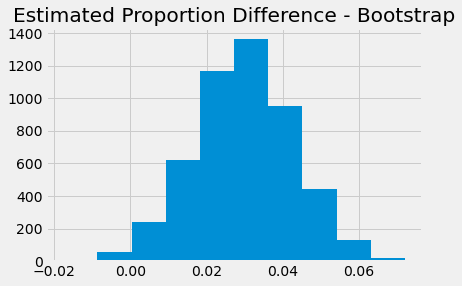

In [11]:
# the code for the histogram in Question 3 is here
def proportions_in_resamples_dif(nboot):
    statistics = np.array([])
    for i in np.arange(nboot):
        bootstrap = votes.sample(num_votes,replace=True)
        paul_stat = np.count_nonzero(bootstrap.vote == 'Paul')/num_votes
        christie_stat = np.count_nonzero(bootstrap.vote == 'Christie')/num_votes
        sample_statistic = paul_stat - christie_stat
        statistics = np.append(statistics, sample_statistic)
    return statistics

sampled_prop_difs = proportions_in_resamples_dif(5000)

plt.hist(sampled_prop_difs)
plt.title("Estimated Proportion Difference - Bootstrap")
plt.show()

In [12]:
# the bootstrap confidence interval
sample_dif = 47/679 - 27/679
L0 = np.percentile(sampled_prop_difs-sample_dif,0.5)
U0 = np.percentile(sampled_prop_difs-sample_dif,99.5)

print("Bootstrapped 99% confidence interval for Candidate Paul's true lead over Candidate Christie: [{:f}, {:f}]".format(sample_dif-U0, sample_dif-L0))
[sample_dif - U0, sample_dif -L0]                                                                                                                 

Bootstrapped 99% confidence interval for Candidate Paul's true lead over Candidate Christie: [-0.002946, 0.061856]


[-0.002945508100147265, 0.0618556701030928]

**Question 4.**

Interpret the 99% interval you obtained. What does it tell you about the lead Candidate Paul has?

*Answer here:*  The 99% interval [-0.002946, 0.061863] indicates that in 99% of simulations of the sample, the calculated difference in proportions of votes that these candidates have will lie within this interval. Because the interval leans towards the positive side, there is a good chance that Paul has a lead over Christie. Nevertheless, because there are negative values in the interval, it is entirely possible that Paul is actually behind Christie by almost as much as 0.3% of votes. 


## 3. Draw toy confidence intervals 


A computational experiment is described on this page "The distinction between confidence intervals, prediction intervals and tolerance intervals." Graphpad knowledgebase article
https://www.graphpad.com/support/faq/the-distinction-between-confidence-intervals-prediction-intervals-and-tolerance-intervals/
and the results of this computational experiment (an example of a forward problem, where the relevant parameters are assumed from the start) are presented in two plots, one of which we show here:

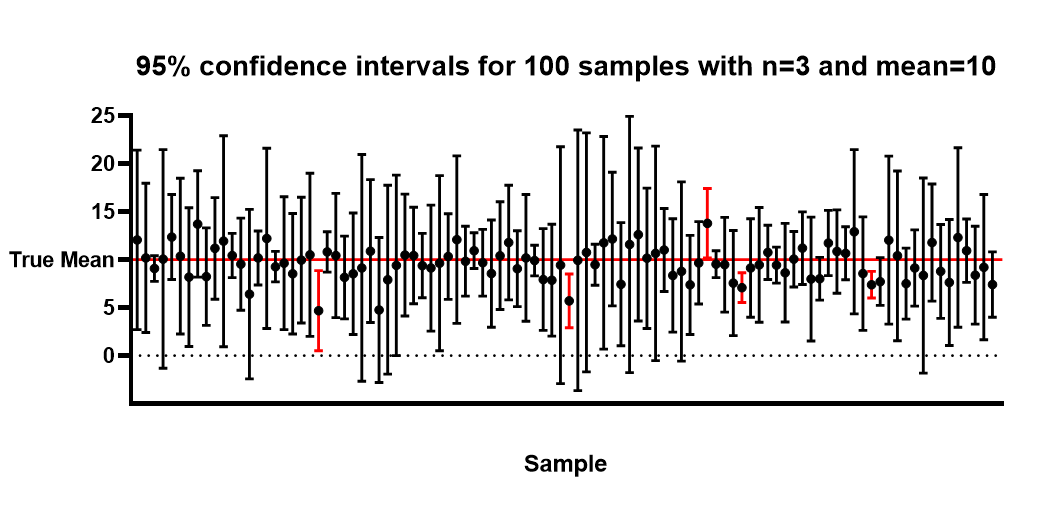


The diagram shows 95% confidence intervals for 100 samples of size 3 from a Normal distribution with true mean of 10 and standard deviation equal to 4. The intervals are obtained using statistical theory.

This assignment asks you to perform similar simulations and draw similar graphs.  You will need to generate a suitable number of normally distributed variables, construct bootstrap confidence intervals, and present the results in a dot plot with error bars. We will use samples of size 30 because the bootstrap does not work well for samples of size 3.

**Useful code**. Here is some code that makes a dot-plot with error bars. You will need to replace the values and add labels.

In [13]:
def plot_some_dots(means, errorbars, truemean, title="Title"):
    '''plots dot plot with means on y, error bars on y of width
    errorbars, and a line at the value truemean.  If the errorbars
    fail to contain truemean, the dot plot is overwritten with 
    red errorbars.'''
# These two lines test that the inputs are of the right shape
    assert len(means) == len(errorbars) # Must provide one errorbar for each mean
# plot all the dots black
    plt.figure(figsize=(12,4))
    plt.errorbar(range(len(means)), means, errorbars, fmt=".k", capsize=5, ecolor="black", linewidth=3)
# find the points that contain the true mean
    outsideindexes = np.where( (means - errorbars > truemean ) | 
                               (means + errorbars < truemean ))[0]  
    outsidemeans = means[outsideindexes]
    outsidebars = errorbars[outsideindexes]
# plot some of the dots red:
    plt.errorbar(outsideindexes, outsidemeans, outsidebars, fmt=".k", capsize=5, ecolor="red", linewidth=3)
    plt.plot([0, len(means)], [truemean, truemean], color="yellow")
    plt.xlabel("Sample")
    plt.title(title)

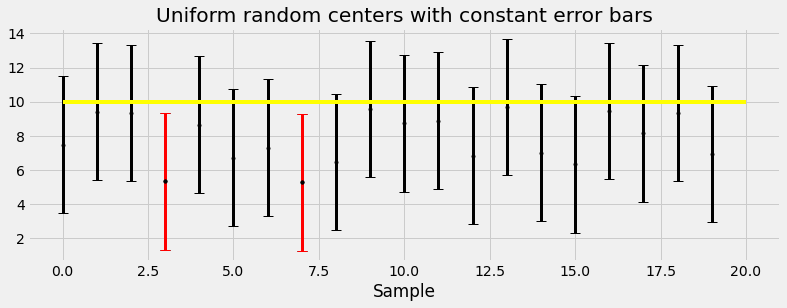

In [14]:
# run this to generate a dot plot 
# it is based on simulated data so you get a different plot if you run it repeatedly
plot_some_dots(np.random.random(20)*5+5, 4*np.ones(20), 10, 
               title="Uniform random centers with constant error bars")

We assume data are generated from a normally distributed "population" with mean 10 and standard deviation 4. The next cell constructs one sample, called `sample1`, of size 30 from this population.

In [15]:
# run this cell to obtain one sample of size 30
# from a normal distribution with mean=10 and sd=4
sample1=np.random.normal(loc=10, scale=4, size=30)
sample1

array([10.52408238, 11.24412641,  7.49081612, 10.16793066,  8.25241579,
       10.30374456,  8.90098725,  9.17838678,  7.75596593, 14.01039316,
       12.96193782,  9.12160198,  7.83853819,  1.29256659,  3.42787369,
        3.80804404, 14.62044654, 10.29641629,  6.26935303,  2.96942728,
        6.78660779, 12.49273165, 11.98616464, 11.4779826 ,  4.01841597,
       12.05651811,  7.86725551, 10.54740782, 11.47126952,  9.56085672])

**Question 1.** Assume that the `sample1` data is a simple random sample from a population with mean $\mu$. Calculate a 95% **percentile** bootstrap confidence interval for $\mu$ using these data.

In [16]:
# code here
def resample(give_samp, ntimes):
    stats = np.array([])
    for i in np.arange(ntimes):
        bootstrap = np.random.choice(give_samp,len(give_samp), replace = True)
        stat = np.mean(bootstrap)
        stats = np.append(stats, stat)
    return stats
b_results = resample(sample1, 5000)
mu_lb = np.percentile(b_results, 2.5)
mu_ub = np.percentile(b_results, 97.5)
print("Bootstrapped 95% confidence interval for sample1: [{:f}, {:f}]".format(mu_lb, mu_ub))

Bootstrapped 95% confidence interval for sample1: [7.789544, 10.113325]


*Answer here:* [9.505097, 12.129618]

**Question 2.** The interval constructed above might not be symmetric around the sample mean. Construct a symmetric (around the sample mean) 95% confidence interval of the form $\hat\mu\pm w$ where $\hat\mu$ is the sample mean and $w$ is obtained from the bootstrap distribution of $\hat\mu$.



In [17]:
# code here
mu_hat = np.mean(sample1)
w = 2*np.std(b_results)
[mu_hat - w, mu_hat + w]

[7.763698934900545, 10.149652053059214]

*Answer here:* [9.524909661646367, 12.196732120350136]

**Question 3.**  Plot a dot-plot of 95% confidence intervals of 100 samples from the above normal distribution with mean 10 and standard deviation 4 (i.e., generate 100 samples the way `sample1` was generated and construct the intervals as in **Question 2**). How many intervals do not contain the true mean (which is 10)?

The number of intervals that do not contain the true mean is:  9


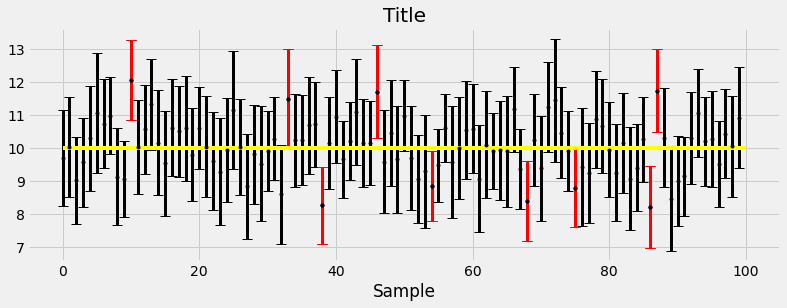

In [18]:
#code here
sample_means = []
error_bars = []
not_10 = 0
for i in range(0,100):
    test_sample = np.random.normal(loc=10, scale=4, size=30)
    sample_mean = np.mean(test_sample)
    sample_means = np.append(sample_means, sample_mean)
    w_sample = 2*np.std(resample(test_sample, 1000))
    error_bars = np.append(error_bars, w_sample)
    if(sample_mean+w_sample < 10 or sample_mean-w_sample > 10):
        not_10 = not_10+1
        
    
plot_some_dots(sample_means, error_bars, 10)
print("The number of intervals that do not contain the true mean is: ", not_10)
#print(sample_means.shape)
#print(error_bars.shape)


**Question 4.**  Calculate the probability that correctly-calculated 95% confidence intervals will fail to contain the correct answer 9 or more times out of 100 trials.  (Hint: binomial setting and binomial distribution)  

In [19]:
np.math.comb(100,9)*(0.95**91)*(0.05**9)
1-scipy.stats.binom.cdf(8,100,p=0.05)

NameError: name 'scipy' is not defined

*Answer here:* 0.0349

In [20]:
test = np.array([2,3,4,5,6,7,7])
np.count_nonzero(test==7)

2